<img src="images/python-lunch.jpg" align="right" width=100/><h1>Python for Lunch</h1>

#### [Folgert Karsdorp](https://github.com/fbkarsdorp)

---

In [27]:
print("There ain't no such thing as a free lunch.")

There ain't no such thing as a free lunch.


Everyone can learn how to program and the best way to learn is by doing. During this lunch you will be asked to write a lot of code. Click any block of code in this tutorial, such as the one above, and press ctrl+enter to run it. Let's begin right away and write our first little program! Have a look at the following code block, run it, and try to understand what is happening. Can you replace some or all of the words with different ones to print a new sentence?

In [24]:
word1 = "Python"
word2 = "for"
word3 = "Lunch"

print(word1 + " " + word2 + " " + word3)

Python for Lunch


In the previous code block, we made use of so-called variables. Variables can thought of as kind of container in which you can store all kinds of information. In the previous example we stored the string `"Python"` into the variable `word1`. Although they look similar, there is an important difference between strings such as `"Python"` and variables such as `word2`. As you can see strings are surrounded by quotation marks, whereas variables are not. Without those quotes Python thinks its dealing with variables. To make the difference more clear, have a look at the following lines of code. 

In [26]:
Python = "Lunch"
Lunch = "Python"

print(Python + " " + word2 + " " + Lunch)

Lunch for Python


This example shows that variable names can be chosen arbitrarily. *We* give a certain value a name, and we are free to pick one to our liking. It is, however, recommended to use senseful names because it helps you to remember what you stored in a variable. 

Variables are not just strings. They can also be numbers or other more complicated objects which we'll see in a moment. A more general term for the objects we store into variables is *value*. If you read a programming book, people generally speak about storing, or assigning values to variables. Have a look at the following code block. Can you add a line at the bottom that prints the addition of `small_number` and `large_number`?

In [ ]:
small_number = 1
large_number = 100000000

Even more tricky: can you store the result of adding these numbers into a new variable called `even_larger_number`?

In [ ]:
# remove this line and insert your code

This very basic concept of variables and values lies at the heart of almost all computer code. Variables allow to store information for later reuse and manipulation, to which we will now turn.

---

## Python for Data Carpentry

<img src="images/messydata.jpeg" align="right" width=400/>For scholars in the Humanities working with text, text cleaning is probably one of the most important and most labour intensive activities. A lot of data collections we work with come from old manuscripts, websites, books and often in a format that is not easily readable. Moreover, the data is often highly messy and needs cleansing before we can proceed with our analyses. Python can be an immense help in both obtaining and cleaning data for further research. I will try to show some of the basic steps you need to take to obtain and clean your data. We will work with a nice corpus of chain letters which can be found [here](http://www.silcom.com/~barnowl/chain-letter/archive/%21content.html). 

If you want to obtain this corpus without the help of Python (or some other programming language), you probably need to click on each of the letters, copy the contents of the page and manually save that in a file. As the archive consists of over 900 letters, this will probably take you a day if not more. Once you have some basic understanding of Python, you could write a script to do all this tedious and boring work for you. Let's start with downloading a single letter. The following code block contains a lot of new stuff that you don't yet. Still, you should be able to figure out what is going on here. Have a go!

In [ ]:
import requests

url = "http://www.silcom.com/~barnowl/chain-letter/archive/le1995-08_dl-_wk.htm"
webpage = requests.get(url)

print(webpage.text)

Python is an open source, and very popular programming language. As such, many people have written programs for Python that you can use. One example is the `requests` library which we used in this example. It comes preinstalled with the Anaconda Python distribution and you can import those libraries using the statement `import name-of-the-library-you-want-to-import`. If you're using a different distribution of Python, you can can download the library from here: [http://www.python-requests.org/en/latest/](http://www.python-requests.org/en/latest/).

Now that we have downloaded the file, we would like to remove all HTML markup. Of course, automatically. The library [Beautiful Soup](http://www.crummy.com/software/BeautifulSoup/) is yet another wonderful example of freely available and open source software. We will use that library to extract all the text from the HTML page. Again, just try to read the code, execute the cell, and try figure out what is happening.

In [ ]:
import bs4

souped = bs4.BeautifulSoup(webpage.text)

print(souped.text)

The only left is to write some code that will automatically download all the letters we're interested in. In this brief tutorial I don't have the time to fully explain how you can do that. I want to download all chain letters of the *death lottery* type. The manual of the website explains that these letters contain the tagt `_dl_` in their url. I also only want to extract the English chain letter. This is marked with the tag `le`. The following code block contains all the code you need to download all the pages, extract the text and store them into a variable called `death_lottery_pages`. Have a look. Don't be scared. Just try to figure out what the different parts probably try to achieve. 

**A little warning**: it will take some time to download all the pages. So once, you executed the cell, please be patient.

In [88]:
archive = requests.get("http://www.silcom.com/~barnowl/chain-letter/archive/%21content.html")
souped = bs4.BeautifulSoup(archive.text)

death_lottery_links = []
for link in souped.find_all('a', href=True):
    if '_dl_' in link['href'] and link['href'].startswith('le'):
        death_lottery_links.append(link['href'])

base_url = "http://www.silcom.com/~barnowl/chain-letter/archive/"
death_lottery_pages = []
for link in death_lottery_links:
    fullink = base_url + link
    webpage = requests.get(fullink)
    souped_page = bs4.BeautifulSoup(webpage.text)
    death_lottery_pages.append(souped_page.text)

In [98]:
len(death_lottery_pages)

158

The variable `death_lottery_pages` now holds 158 chain letters. This variable is called a `list`, which is an orderded sequence of objects. You can print a single letter by indexing this list:

In [ ]:
print(death_lottery_pages[1])

Can you change the number in the code above to print a different letter?

As you can see, the letters still contain a lot of whitespace that we would rather remove. Python has a lot of functionality to work with text. A very convenient function is called `strip`, which allows you to remove unwanted whitespace from a string. Let's see how that works:

In [ ]:
print(death_lottery_pages[1].strip())

That's already a lot better, but we're not quite there yet. There are many sophisticated tokenizer available, but these are not included with the Anaconda distribution. An example is the [NLTK tokenizer](http://www.nltk.org/) or the [tokenizer](http://nlp.stanford.edu/software/) developed at Stanford University. For now we will make use of a fairly simple tokenizer that is a little rough on the edges, but it will do. We import and use the tokenizer as follows:

In [119]:
from simple_tokenizer import tokenize

tokenize(death_lottery_pages[1], lowercase=False)

['luck',
 'chain',
 'letter',
 'published',
 'condensed',
 'death',
 'lottery',
 'type',
 'names',
 'us',
 'luck',
 'chain',
 'letter',
 'published',
 'condensed',
 'death',
 'lottery',
 'type',
 'names',
 'us',
 'trust',
 'is',
 'the',
 'lord',
 'with',
 'all',
 'your',
 'heart',
 'and',
 'in',
 'all',
 'thy',
 'ways',
 'acknowledge',
 'him',
 'and',
 'he',
 'will',
 'light',
 'the',
 'way',
 'this',
 'prayer',
 'has',
 'been',
 'sent',
 'to',
 'you',
 'for',
 'good',
 'luck',
 'the',
 'original',
 'copy',
 'came',
 'from',
 'the',
 'netherlands',
 'it',
 'has',
 'been',
 'around',
 'the',
 'world',
 'nine',
 'times',
 'the',
 'luck',
 'has',
 'been',
 'sent',
 'to',
 'you',
 'you',
 'are',
 'to',
 'receive',
 'good',
 'luck',
 'within',
 'four',
 'days',
 'after',
 'receiving',
 'this',
 'letter',
 'it',
 'is',
 'no',
 'joke',
 'you',
 'will',
 'receive',
 'it',
 'in',
 'the',
 'mail',
 'send',
 'copies',
 'of',
 'this',
 'letter',
 'to',
 'people',
 'you',
 'think',
 'need',
 'good'

Can you change the argument `lowercase=False` to `lowercase=True`?

Finally, we will create a tokenized version of our chain letter corpus using the following lines of code: 

In [122]:
death_lottery_corpus = []
for letter in death_lottery_pages:
    death_lottery_corpus.append(tokenize(letter, lowercase=True))

---

## Python for Data Analysis

<img src="images/dataanalysis.jpg" align="left" width=400/> We now proceed with a brief introduction into data analysis with Python. There are again many excellent libraries available for doing data analysis. The most sophisticated data analysis library is the Python Data Analysis Library, or Pandas. Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. It comes preinstalled with the Ananconda Python distribution. 

I would like to show some basic exploratory analyses that help you to get a better idea of the data your working with. In the previous section we created a corpus of chain letters. Let's try to obtain some general statistics from this corpus. First we print the number of letters in the corpus:

In [123]:
print(len(death_lottery_corpus))

158


Next it would be interesting to know the average word token length of the letters. We start with initializing a variable in which we sum the number words per letter. We then divided that number by the number of letters in the corpus:

In [125]:
token_count = 0
for letter in death_lottery_corpus:
    for word in letter:
        token_count += 1
        
print(token_count / len(death_lottery_corpus))

419.3987341772152


The build-in library `statistics` let's you compute a number of basic statistics in a much more convenient way. Let's first create a list holding for each letter the number of tokens.

In [131]:
from statistics import stdev, mean, variance

letter_lengths = []
for letter in death_lottery_corpus:
    letter_lengths.append(len(letter))

We can then use this list to compute the mean:

In [140]:
mean(letter_lengths)

419.3987341772152

the variance:

In [141]:
variance(letter_lengths)

3121.2858582600984

and the standard deviation:

In [142]:
stdev(letter_lengths)

55.86846926720025

To obtain a better understanding of the distribution we're dealing with, it's a good idea to plot the distribution using a historgram or some density. Again, just show some of the cool stuff that is included in the Anaconda distrubtion, we make use of another wonderful library called [seaborn](http://stanford.edu/~mwaskom/software/seaborn/). To make use library we first need to import it. 

**Before you do that, please execute the following line which will make sure that the plots are shown in the notebook.**

In [147]:
%matplotlib inline

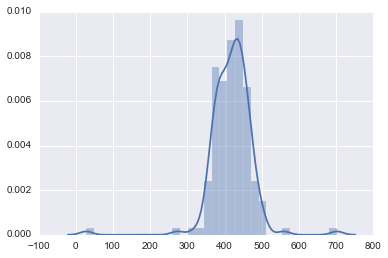

In [149]:
import seaborn

seaborn.distplot(letter_lengths)

Well, ain't that a pretty normal distribution! Now let's get a little more sophisticated. The corpus we're dealing with is a chain letter corpus Therefore, we could naively assume that most letters are very much alike. The letters are chronologically ordered on the website, and we downloaded them in that order, which allows to conveniently plot the number of new word types we attest with every new letter. Execute the following cell to see a list of all urls we downloaded:

In [186]:
death_lottery_links

['le1974-10_dl_n27.htm',
 'le1975p_dl_n_sherman.htm',
 'le1975_dl_n23_a1.htm',
 'le1975_dl_n26%2817cpls%29_wife%21_a2.htm',
 'le1976-07-26p_dl_fege_xlist_q20.htm',
 'le1977-06-08_dl_fgge_q20.htm',
 'le1977-09-22p1_dl_TrustLast_q20.htm',
 'le1978-04_dl_q20n0.htm',
 'le1979-01_dl_xmoney%282%29_q20.htm',
 'le1979-05_dl_tw%21.htm',
 'le1979-06-21_dl_t_q20n0.htm',
 'le1979-06_dl_ignor_wt.htm',
 'le1979-07-30p_dl_w%27t.htm',
 'le1980-12-23_dl_wt_dates.htm',
 'le1980_dl_wt.htm',
 'le1980u_dl_B-L29_wb.htm',
 'le1980_dl_wb%21.htm',
 'le1980u_dl_wt.htm',
 'le1980uup_dl_wt_gold.htm',
 'le1981-01-28p1_dl_wb.htm',
 'le1981-04_dl_wt.htm',
 'le1982-01-28_dl_m_t.htm',
 'le1982-02-28_dl_wt.htm',
 'le1982-09-20_dl_wt_dates.htm',
 'le1982_dl_wb.htm',
 'le1983-02_dl_w%28k%29.htm',
 'le1983-04_dl_w%28k%29.htm',
 'le1983-05_dl_w%28k%29.htm',
 'le1983-06-13_dl_wl%21_e.htm',
 'le1983-06-30_dl_wt%27.htm',
 'le1983-10-04_dl_wk%21.htm',
 'le1983_dl_wl.htm',
 'le1983_dl_wt.htm',
 'le1984-05_dl_wk.htm',
 'le1984-0

My initial hypothesis would be that after seeing only a few letters, the new word curve will reach its asymptote. 

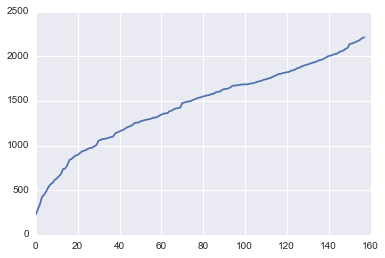

In [164]:
words_seen = set()
unique_words_so_far = []
for letter in death_lottery_corpus:
    for word in letter:
        if word not in words_seen:
            words_seen.add(word)
    unique_words_so_far.append(len(words_seen))

sns.plt.plot(unique_words_so_far)

Although we can observe that the number of new word types diminishes over time, the effect is definitely not as strong as I would have thought. Although we must have closer look at the data, this curve might suggest that the letters have changed quite a bit over time. Let's have look at some parts of the first and at the last letter in the corpus. Note that these fragments are rather unreadable, because we removed all punctuation.

In [180]:
print(' '.join(death_lottery_corpus[0][30:150]))

sent to you for good luck the original copy came from the netherlands it has been around the world times the luck has been sent to you you are to receive good luck within days of receiving this letter it is no joke you will receive it in the mail send copies of this letter to people you think need good luck please do not send money do not keep this letter it must leave within hours after you receive it a b s officer received don elliot received but he lost it because he broke the chain while in the phillipines general walsh lost his life six days after he received this letter he failed to circulate the prayer


In [185]:
print(' '.join(death_lottery_corpus[-1][42:150]))

sent to you for good luck the original is in new england it has been around the world nine times you will receive good luck with in four days provided you in turn send it on this is no joke you will receive good luck don t send money as fate has no price do not keep this letter it must leave your hands in hours a unites states air force officer received john a elliot received and lost it because she broke the chain while in the philippines genio welsh lost his wife days after receiving the letter however before her death he received please send copies


As we can see, although the letters bear many similarities there are also some interesting differences. In the first letter, we read about a general names Walsh who lost life. In the last letter the general has become a genio who lost his wife. In the next section we will we explore the corpus a little further with the help of some basic data visualization.

## Python for Data Visualization

<img src="images/data-visualization.jpg" align="right" width=400/>

---

You've reached the end of the tutorial. Ignore the code below, it's just here to make the page a little prettier.

In [37]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

<p><small><a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Python for Lunch</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="https://github.com/fbkarsdorp/python-for-lunch" property="cc:attributionName" rel="cc:attributionURL">https://github.com/fbkarsdorp/python-for-lunch</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>. Based on a work at <a xmlns:dct="http://purl.org/dc/terms/" href="https://github.com/fbkarsdorp/python-for-lunch" rel="dct:source">https://github.com/fbkarsdorp/python-for-lunch</a>.</small></p>

---